# **TUGAS 3 - REGRESI LOGISTIK**

**Kelompok 11 - Statistika 2023A**


Anggota Kelompok :
- Nisrina Alissy (1314623008)
- Jessica Aurelia P. (1314623031)

Import library

In [1]:
#Import library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install optbinning
import pandas as pd
from optbinning import OptimalBinning

In [2]:
#input data
link = "https://raw.githubusercontent.com/alissysays/SMT5_NA/refs/heads/main/RAW%20DATA/myopia.csv"
df = pd.read_csv(link)
df.head()

,Unnamed: 0,id,studyyear,myopic,age,gender,spheq,al,acd,lt,vcd,sporthr,readhr,comphr,studyhr,tvhr,diopterhr,mommy,dadmy
0,1,1,1992,Yes,6,Female,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,Yes,Yes
1,2,2,1995,No,6,Female,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,Yes,Yes
2,3,3,1991,No,6,Female,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,No,No
3,4,4,1990,Yes,6,Female,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,No,Yes
4,5,5,1995,No,5,Male,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,Yes,No


# EDA

In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'studyyear', 'myopic', 'age', 'gender', 'spheq',
       'al', 'acd', 'lt', 'vcd', 'sporthr', 'readhr', 'comphr', 'studyhr',
       'tvhr', 'diopterhr', 'mommy', 'dadmy'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  618 non-null    int64  
 1   id          618 non-null    int64  
 2   studyyear   618 non-null    int64  
 3   myopic      618 non-null    object 
 4   age         618 non-null    int64  
 5   gender      618 non-null    object 
 6   spheq       618 non-null    float64
 7   al          618 non-null    float64
 8   acd         618 non-null    float64
 9   lt          618 non-null    float64
 10  vcd         618 non-null    float64
 11  sporthr     618 non-null    int64  
 12  readhr      618 non-null    int64  
 13  comphr      618 non-null    int64  
 14  studyhr     618 non-null    int64  
 15  tvhr        618 non-null    int64  
 16  diopterhr   618 non-null    int64  
 17  mommy       618 non-null    object 
 18  dadmy       618 non-null    object 
dtypes: float64(5), int64(10), obj

In [5]:
# Mengecek missing value
df.isna().sum()

,0
Unnamed: 0,0
id,0
studyyear,0
myopic,0
age,0
gender,0
spheq,0
al,0
acd,0
lt,0


In [6]:
#Cek apakah terdapat duplikat data
df.duplicated().any()

np.False_

In [7]:
#ringkasan statistik
df.describe()

,Unnamed: 0,id,studyyear,age,spheq,al,acd,lt,vcd,sporthr,readhr,comphr,studyhr,tvhr,diopterhr
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,309.500000,309.500000,1992.359223,6.299353,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799
std,178.545512,178.545512,1.734507,0.712950,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715
min,1.000000,1.000000,1990.000000,5.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,155.250000,155.250000,1991.000000,6.000000,0.456250,22.040000,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000
50%,309.500000,309.500000,1992.000000,6.000000,0.729000,22.465000,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000
75%,463.750000,463.750000,1994.000000,6.000000,1.034000,22.970000,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000
max,618.000000,618.000000,1995.000000,9.000000,4.372000,24.560000,4.250000,4.112000,17.300000,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000


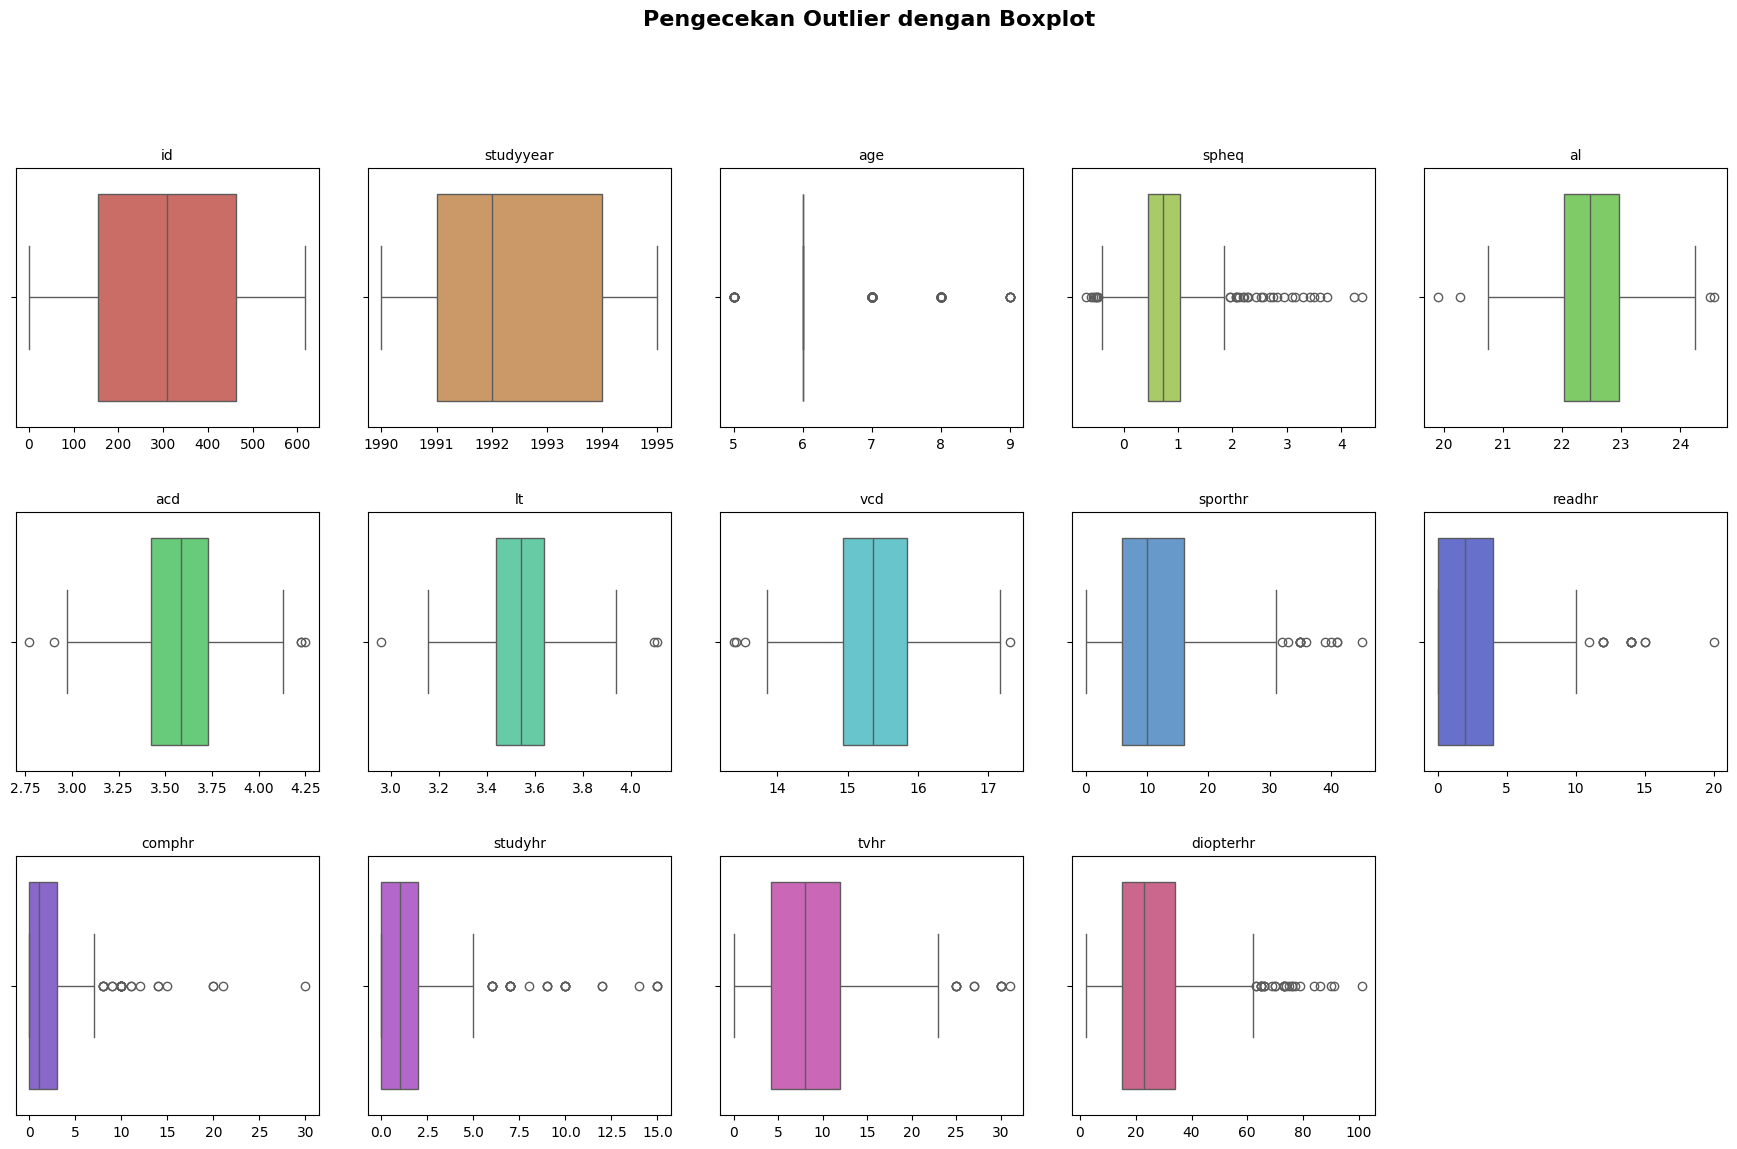

In [8]:
# Boxplot untuk mengecek outlier (dengan data awal)
kolom_numerik = df.describe().columns[1:18]
# Buat palet
palette = sns.color_palette("hls", len(kolom_numerik))
plt.figure(figsize=(18, 18))

# Loop melalui kolom dan indeks
for i in enumerate(kolom_numerik):
    # i[0] adalah indeks (0, 1, 2...), i[1] adalah nama kolom
    plt.subplot(5, 5, i[0] + 1)
    sns.boxplot(
        x=df[i[1]],
        color=palette[i[0]]
    )
    plt.title(i[1], fontsize=10)
    plt.xlabel('')

plt.suptitle("Pengecekan Outlier dengan Boxplot", y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout(pad=3.0) # Menambahkan padding agar lebih rapi
plt.show()

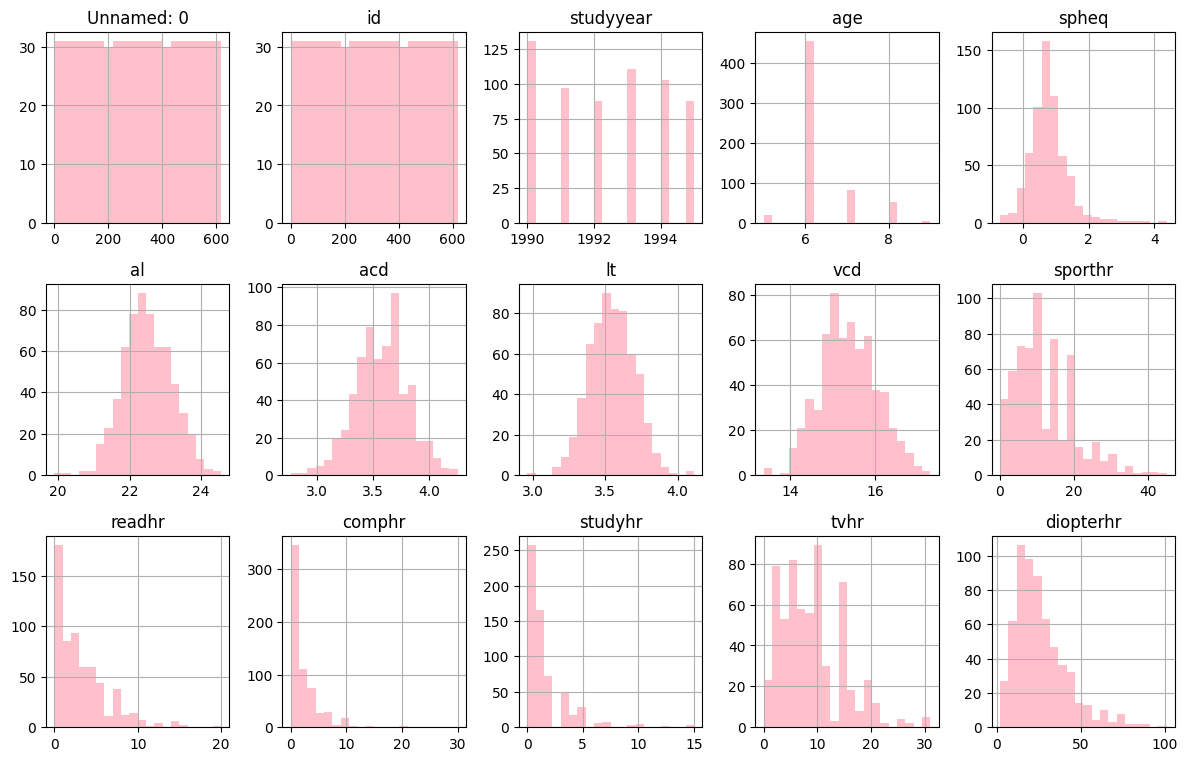

In [9]:
# Visualisasi
df.hist(figsize=(12, 10), bins=20, color='pink', layout=(4, 5))
plt.tight_layout()
plt.show()

/tmp/ipython-input-742714188.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-742714188.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-742714188.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-742714188.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


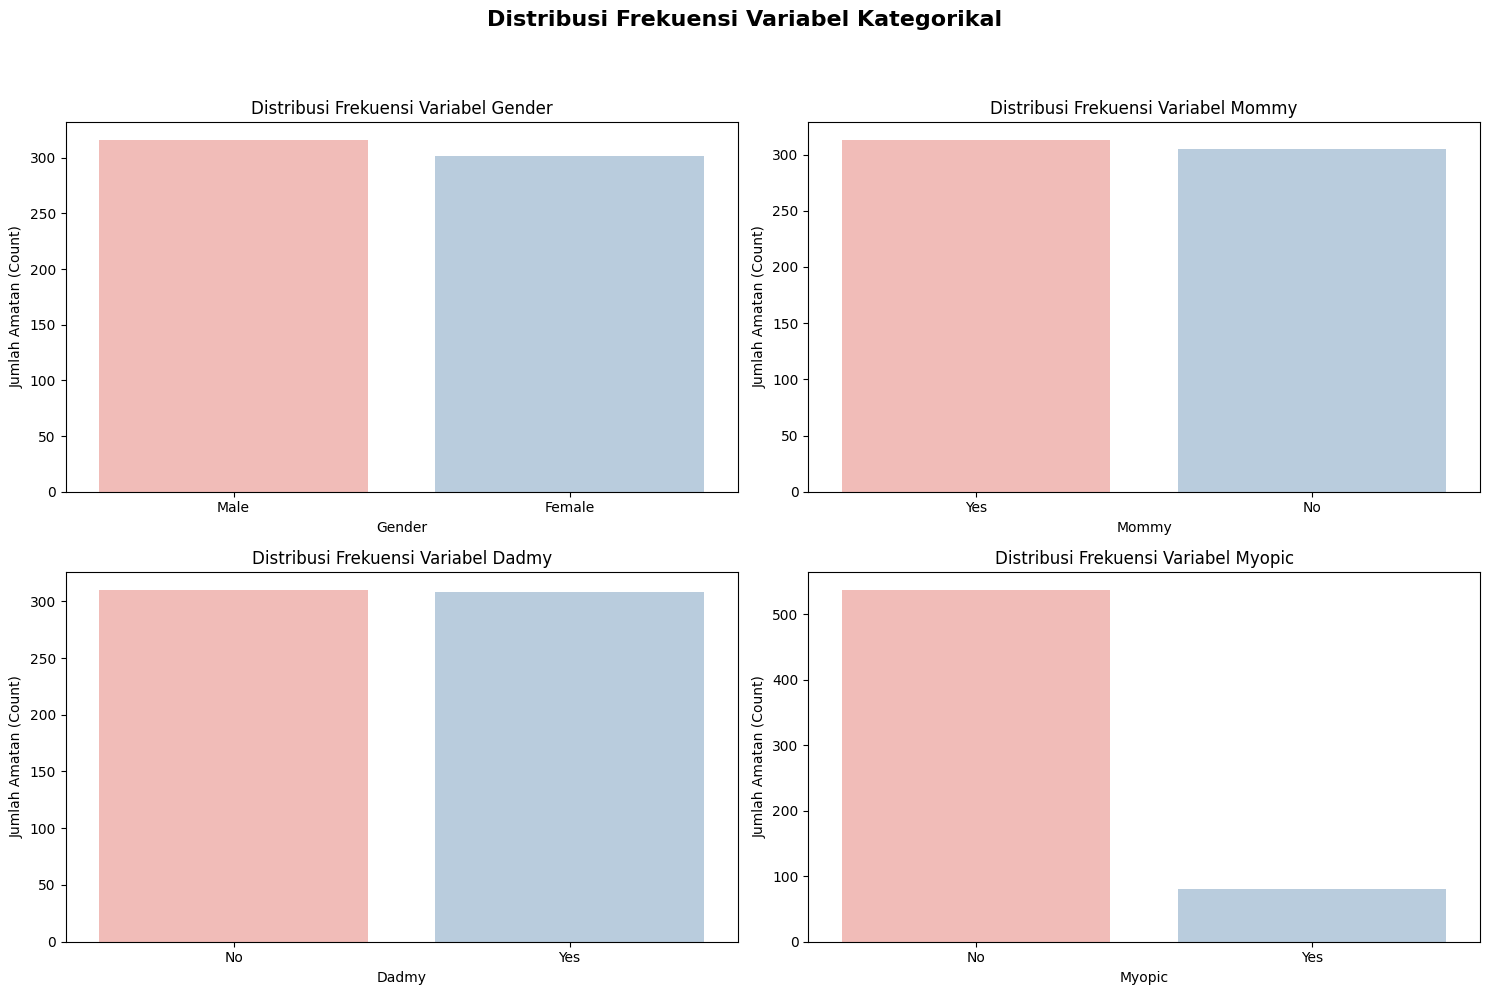

In [13]:
# Visualisasi untuk melihat distribusi variabel kategorik
var_kategorik = ['gender','mommy','dadmy','myopic']
plt.figure(figsize=(15, 10))
# Loop melalui setiap variabel kategorikal
for i, col in enumerate(var_kategorik):
    plt.subplot(2, 2, i + 1)
    sns.countplot(
        x=col,
        data=df,
        palette='Pastel1', # Pilihan palet warna
        order=df[col].value_counts().index # Mengurutkan dari yang terbanyak
    )

    # Memberi label dan judul
    plt.title(f'Distribusi Frekuensi Variabel {col.capitalize()}', fontsize=12)
    plt.xlabel(col.capitalize(), fontsize=10)
    plt.ylabel('Jumlah Amatan (Count)', fontsize=10)

plt.suptitle("Distribusi Frekuensi Variabel Kategorikal", y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

In [9]:
# Mengambil kolom numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# buang kolom yang tidak relevan
drop_cols = ['id','myopic']  # id bukan var prediktor, myopic adalah target
num_cols = [c for c in num_cols if c not in drop_cols]

df_num = df[num_cols]
df_num.head()



,Unnamed: 0,studyyear,age,spheq,al,acd,lt,vcd,sporthr,readhr,comphr,studyhr,tvhr,diopterhr
0,1,1992,6,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34
1,2,1995,6,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12
2,3,1991,6,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14
3,4,1990,6,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37
4,5,1995,5,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4


In [10]:
# Matriks Korelasi
corr_matrix = df_num.corr()
corr_matrix

,Unnamed: 0,studyyear,age,spheq,al,acd,lt,vcd,sporthr,readhr,comphr,studyhr,tvhr,diopterhr
Unnamed: 0,1.000000,-0.058385,0.030029,0.050831,-0.080880,-0.018525,0.055831,-0.089469,0.054532,0.051438,0.045723,0.045283,-0.007511,0.063068
studyyear,-0.058385,1.000000,-0.439659,0.082645,-0.138326,-0.087708,0.108677,-0.136459,-0.262745,-0.154631,-0.045047,-0.282425,-0.186834,-0.289733
age,0.030029,-0.439659,1.000000,-0.118255,0.220784,0.191849,-0.185531,0.202472,0.057538,0.130194,0.056929,0.399324,0.069395,0.286820
spheq,0.050831,0.082645,-0.118255,1.000000,-0.305512,-0.238784,0.072699,-0.247130,-0.022468,-0.099501,-0.031088,-0.054873,-0.080934,-0.120611
al,-0.080880,-0.138326,0.220784,-0.305512,1.000000,0.456296,-0.328939,0.941916,0.112004,0.017944,0.086328,0.098326,0.077170,0.111527
acd,-0.018525,-0.087708,0.191849,-0.238784,0.456296,1.000000,-0.339291,0.199447,0.075161,0.011481,0.071666,0.051826,-0.042761,0.040157
lt,0.055831,0.108677,-0.185531,0.072699,-0.328939,-0.339291,1.000000,-0.451594,-0.032745,0.018481,-0.025344,-0.037580,0.049095,0.002875
vcd,-0.089469,-0.136459,0.202472,-0.247130,0.941916,0.199447,-0.451594,1.000000,0.096235,0.010120,0.069369,0.091759,0.082579,0.099774
sporthr,0.054532,-0.262745,0.057538,-0.022468,0.112004,0.075161,-0.032745,0.096235,1.000000,0.131597,0.010185,0.115844,0.173470,0.189365
readhr,0.051438,-0.154631,0.130194,-0.099501,0.017944,0.011481,0.018481,0.010120,0.131597,1.000000,0.035300,0.262374,0.003092,0.697522


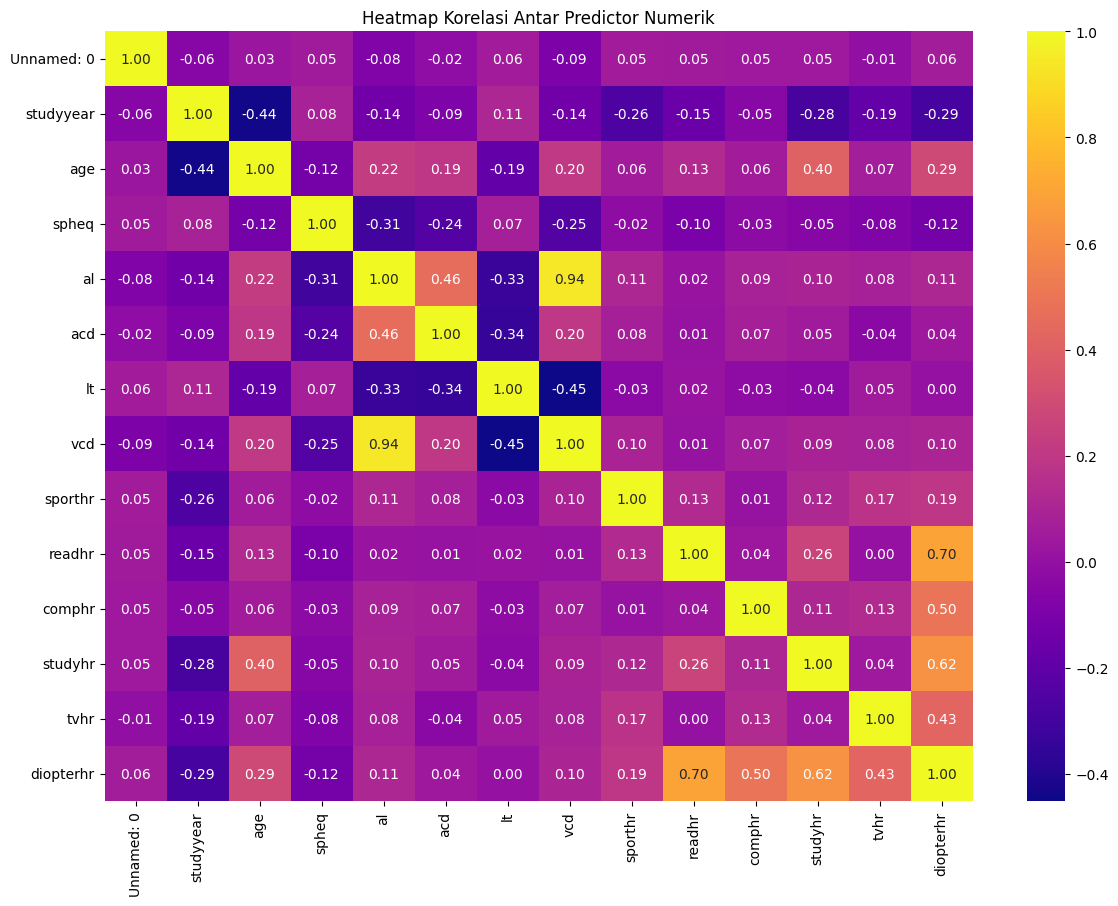

In [11]:
# Heatmap korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="plasma")
plt.title("Heatmap Korelasi Antar Predictor Numerik")
plt.show()


# Preprocessing data

In [12]:
#menghapus kolom yang tidak relevan
df=df.drop(columns=['Unnamed: 0','id'])
df.head()

,studyyear,myopic,age,gender,spheq,al,acd,lt,vcd,sporthr,readhr,comphr,studyhr,tvhr,diopterhr,mommy,dadmy
0,1992,Yes,6,Female,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,Yes,Yes
1,1995,No,6,Female,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,Yes,Yes
2,1991,No,6,Female,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,No,No
3,1990,Yes,6,Female,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,No,Yes
4,1995,No,5,Male,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,Yes,No


In [13]:
#Mengatasi Outlier
# Asumsikan DataFrame Anda bernama df

# Daftar kolom yang akan di-capping
kolom_outlier = ['lt','vcd','acd','sporthr', 'readhr','comphr','studyhr','tvhr','diopterhr', 'al', 'spheq']

for kolom in kolom_outlier:
    # 1. Hitung Kuartil dan IQR
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1

    # 2. Hitung Batas Atas dan Batas Bawah
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 3. Capping (Mengganti nilai outlier dengan batas)
    # Capping Batas Atas
    df[kolom] = np.where(df[kolom] > upper_bound,
                         upper_bound,
                         df[kolom])

    # Capping Batas Bawah
    df[kolom] = np.where(df[kolom] < lower_bound,
                         lower_bound,
                         df[kolom])

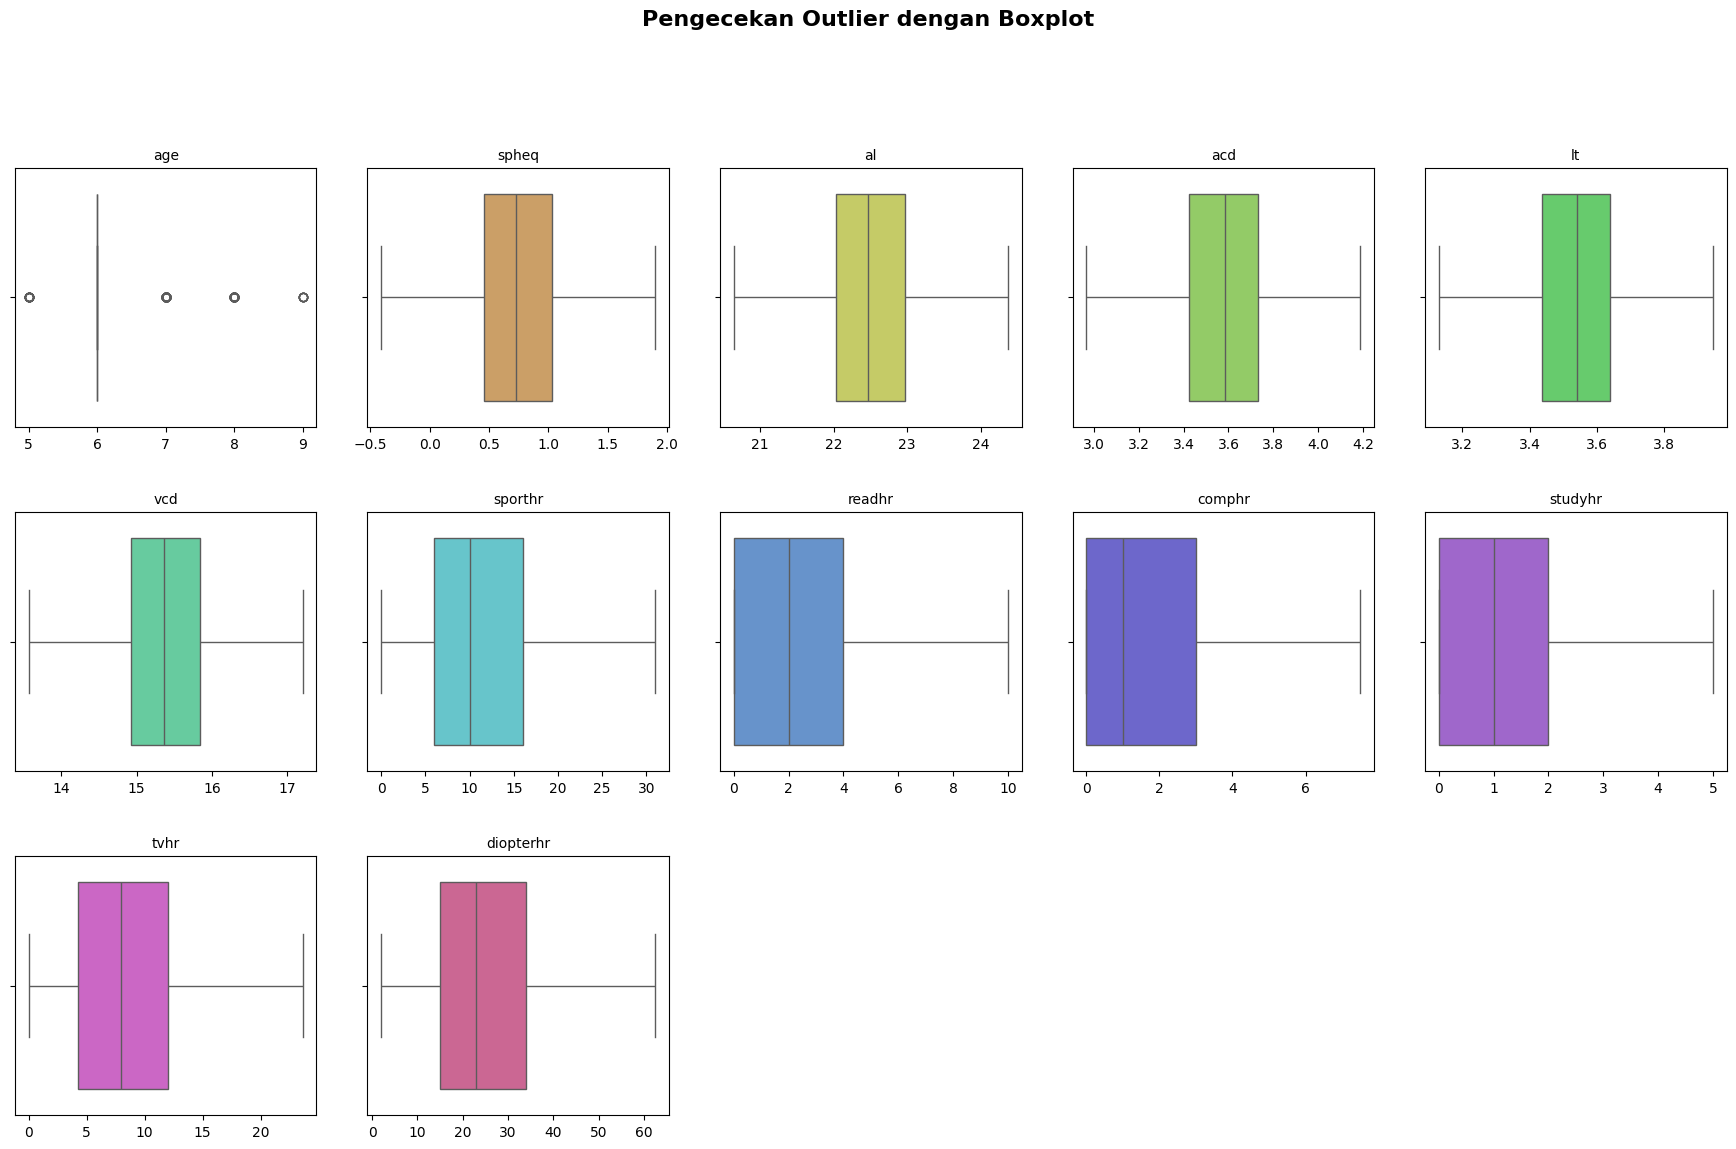

In [14]:
# Boxplot untuk mengecek outlier setelah outlier ditangani
kolom_numerik = df.describe().columns[1:18]
# Buat palet
palette = sns.color_palette("hls", len(kolom_numerik))
plt.figure(figsize=(18, 18))

# Loop melalui kolom dan indeks
for i in enumerate(kolom_numerik):
    # i[0] adalah indeks (0, 1, 2...), i[1] adalah nama kolom
    plt.subplot(5, 5, i[0] + 1)
    sns.boxplot(
        x=df[i[1]],
        color=palette[i[0]]
    )
    plt.title(i[1], fontsize=10)
    plt.xlabel('')

plt.suptitle("Pengecekan Outlier dengan Boxplot", y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout(pad=3.0) # Menambahkan padding agar lebih rapi
plt.show()

In [15]:
#Ringkasan statistik setelah oulier ditangani
df.describe()

,studyyear,age,spheq,al,acd,lt,vcd,sporthr,readhr,comphr,studyhr,tvhr,diopterhr
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,1992.359223,6.299353,0.765577,22.498042,3.578828,3.541214,15.377217,11.825243,2.710356,1.885922,1.307443,8.875202,25.521845
std,1.734507,0.712950,0.501992,0.672847,0.228562,0.151998,0.662059,7.585827,2.782544,2.200157,1.570383,5.491288,14.526813
min,1990.000000,5.000000,-0.410375,20.645000,2.965000,3.130000,13.565000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1991.000000,6.000000,0.456250,22.040000,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000
50%,1992.000000,6.000000,0.729000,22.465000,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000
75%,1994.000000,6.000000,1.034000,22.970000,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000
max,1995.000000,9.000000,1.900625,24.365000,4.189000,3.946000,17.205000,31.000000,10.000000,7.500000,5.000000,23.625000,62.500000


In [16]:
#Memisahkan Fitur X dan Target Y
# Encoding Variabel Target (myopic)
# Mengubah 'Yes' menjadi 1 dan 'No' menjadi 0 (Label Encoding)
df['myopic'] = df['myopic'].map({'Yes': 1, 'No': 0})
y = df['myopic']

# Pisahkan Fitur (X)
X = df.drop(['myopic'], axis=1)

# A. Encoding 'gender'
gender_dummy = pd.get_dummies(X['gender'], prefix = 'gender')
gender_dummy.drop('gender_Male', inplace = True, axis=1)

# B. Encoding 'mommy'
mommy_dummy = pd.get_dummies(X['mommy'], prefix = 'mommy')
mommy_dummy.drop('mommy_No', inplace = True, axis=1)

# C. Encoding 'dadmy'
dadmy_dummy = pd.get_dummies(X['dadmy'], prefix = 'dadmy')
dadmy_dummy.drop('dadmy_No', inplace = True, axis=1)

# Hapus kolom kategorikal asli dari X
X.drop(['gender','mommy','dadmy'],axis=1,inplace=True)

# Gabungkan X dengan kolom dummy yang baru
X= pd.concat([X, gender_dummy, mommy_dummy, dadmy_dummy], axis=1)

In [22]:
X.head()

,studyyear,age,spheq,al,acd,lt,vcd,sporthr,readhr,comphr,studyhr,tvhr,diopterhr,gender_Female,mommy_Yes,dadmy_Yes
0,1992,6,-0.052,21.89,3.690,3.498,14.70,31.0,8.0,0.0,0.0,10.0,34.0,True,True,True
1,1995,6,0.608,22.38,3.702,3.392,15.29,4.0,0.0,1.0,1.0,7.0,12.0,True,True,True
2,1991,6,1.179,22.49,3.462,3.514,15.52,14.0,0.0,2.0,0.0,10.0,14.0,True,False,False
3,1990,6,0.525,22.20,3.862,3.612,14.73,18.0,10.0,0.0,0.0,4.0,37.0,True,False,True
4,1995,5,0.697,23.29,3.676,3.454,16.16,14.0,0.0,0.0,0.0,4.0,4.0,False,True,False


In [23]:
y.head()

,myopic
0,1
1,0
2,0
3,1
4,0


### **Tanpa Diskritisasi**

In [24]:
#Pembagian data (20:80)
from sklearn.model_selection import train_test_split

# Asumsikan y adalah variabel target ('myopic')

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, # 20% untuk data testing
    random_state=42 # Untuk reproduktifitas
)
print("\n Hasil Pembagian Data (80:20):")
print(f"X_train (Data Latih Fitur): {X_train.shape}")
print(f"X_test (Data Uji Fitur): {X_test.shape}")
print(f"y_train (Data Latih Target): {y_train.shape}")
print(f"y_test (Data Uji Target): {y_test.shape}")


 Hasil Pembagian Data (80:20):
X_train (Data Latih Fitur): (494, 16)
X_test (Data Uji Fitur): (124, 16)
y_train (Data Latih Target): (494,)
y_test (Data Uji Target): (124,)


In [25]:
# Memastikan semua kolom Boolean dikonversi ke integer (0 atau 1)
for col in X_train.columns:
    if X_train[col].dtype == 'bool':
        X_train[col] = X_train[col].astype(int)

In [26]:
# Melihat nilai VIF untuk cek multikolinearitas
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

pd.options.display.float_format = '{:.4f}'.format
# Tambahkan Konstanta
X_train_const = add_constant(X_train, has_constant='add')

# Hitung VIF untuk SEMUA kolom di X_train_const
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i)
                    for i in range(X_train_const.shape[1])]
vif_data_filtered = vif_data.loc[vif_data['feature'] != 'const']

# Tampilkan nilai VIF
print('Hasil Nilai VIF pada Data Training (X_train)')
print(vif_data_filtered)


Hasil Nilai VIF pada Data Training (X_train)
          feature      VIF
1       studyyear   1.4698
2             age   1.6510
3           spheq   1.2100
4              al 606.5293
5             acd  61.9103
6              lt  27.7972
7             vcd 581.3763
8         sporthr   1.1802
9          readhr   8.1428
10         comphr   3.8828
11        studyhr   4.2849
12           tvhr   4.0965
13      diopterhr  20.3082
14  gender_Female   1.2700
15      mommy_Yes   1.0614
16      dadmy_Yes   1.0393


In [27]:
# Iterasi 1
pd.options.display.float_format = '{:.4f}'.format
# Hapus fitur dengan VIF tertinggi
X_iter_1 = X_train.drop('al', axis=1)

# Hitung Ulang VIF pada X_iter_1
X_iter_1_const = add_constant(X_iter_1, has_constant='add')

# Hitung VIF
vif_data_iter_1 = pd.DataFrame()
vif_data_iter_1["feature"] = X_iter_1_const.columns

vif_list_iter_1 = [variance_inflation_factor(X_iter_1_const.values, i)
                   for i in range(X_iter_1_const.shape[1])]

vif_data_iter_1["VIF"] = vif_list_iter_1

# Filter dan Menampilkan Hasil
vif_data_filtered = vif_data_iter_1.loc[vif_data_iter_1['feature'] != 'const']

print(vif_data_filtered)

          feature     VIF
1       studyyear  1.4690
2             age  1.6503
3           spheq  1.2097
4             acd  1.3478
5              lt  1.5067
6             vcd  1.5205
7         sporthr  1.1799
8          readhr  8.1361
9          comphr  3.8795
10        studyhr  4.2816
11           tvhr  4.0949
12      diopterhr 20.2933
13  gender_Female  1.2676
14      mommy_Yes  1.0612
15      dadmy_Yes  1.0346


In [28]:
# Iterasi 2
pd.options.display.float_format = '{:.4f}'.format
# Hapus fitur dengan VIF tertinggi
X_iter_2 = X_iter_1.drop('diopterhr', axis=1)

X_iter_2_const = add_constant(X_iter_2, has_constant='add')

# --- 4. Hitung VIF ---
vif_data_iter_2 = pd.DataFrame()
vif_data_iter_2["feature"] = X_iter_2_const.columns

# Hitung VIF menggunakan data DENGAN KONSTANTA
vif_list_iter_2 = [variance_inflation_factor(X_iter_2_const.values, i)
                   for i in range(X_iter_2_const.shape[1])]

vif_data_iter_2["VIF"] = vif_list_iter_2

# --- 5. Filter dan Tampilkan Hasil ---
vif_data_filtered_2 = vif_data_iter_2.loc[vif_data_iter_2['feature'] != 'const']

print(vif_data_filtered_2)

          feature    VIF
1       studyyear 1.4427
2             age 1.6388
3           spheq 1.2095
4             acd 1.3383
5              lt 1.5037
6             vcd 1.5172
7         sporthr 1.1747
8          readhr 1.1492
9          comphr 1.1145
10        studyhr 1.4742
11           tvhr 1.1096
12  gender_Female 1.2631
13      mommy_Yes 1.0597
14      dadmy_Yes 1.0337


In [29]:
# Variabel X yang diguanakan
X_train_fix = X_iter_2

In [30]:
#asumsi box tidwell, well
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import logit

# ---------------------------
# 1. Siapkan data
# ---------------------------
df_bt = df.copy()

# Variabel kontinu yang diuji
continuous_vars = ['spheq','sporthr','readhr','comphr','studyhr','tvhr']

# Tambahkan konstanta log untuk menghindari log(0)
for col in continuous_vars:
    df_bt[col + "_log"] = np.log(df_bt[col].replace(0, 0.0001))

# ---------------------------
# 2. Buat formula Box–Tidwell
# ---------------------------
interaction_terms = " + ".join([f"{v}*{v}_log" for v in continuous_vars])
main_terms = " + ".join(continuous_vars)

formula = f"myopic ~ {main_terms} + {interaction_terms}"

print("Formula Box–Tidwell:\n", formula)

# ---------------------------
# 3. Fit model
# ---------------------------
model_bt = logit(formula, data=df_bt).fit()
print(model_bt.summary())


Formula Box–Tidwell:
 myopic ~ spheq + sporthr + readhr + comphr + studyhr + tvhr + spheq*spheq_log + sporthr*sporthr_log + readhr*readhr_log + comphr*comphr_log + studyhr*studyhr_log + tvhr*tvhr_log
Optimization terminated successfully.
         Current function value: 0.233022
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 myopic   No. Observations:                  584
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                           18
Date:                Sun, 23 Nov 2025   Pseudo R-squ.:                  0.2713
Time:                        17:01:15   Log-Likelihood:                -136.08
converged:                       True   LL-Null:                       -186.75
Covariance Type:            nonrobust   LLR p-value:                 1.259e-13
                          coef    std err          z      P>|z|  

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
X_train_fix.columns

Index(['studyyear', 'age', 'spheq', 'acd', 'lt', 'vcd', 'sporthr', 'readhr',
       'comphr', 'studyhr', 'tvhr', 'gender_Female', 'mommy_Yes', 'dadmy_Yes'],
      dtype='object')

In [32]:
#Standarisasi Data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Latih (fit) scaler pada X_train h, lalu transform
X_train_scaled = scaler.fit_transform(X_train_fix)

#  Konversi kembali ke DataFrame untuk kemudahan visualisasi
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_fix.columns)
# Pastikan X_test juga sudah dibersihkan (dihapus kolom VIF yang sama)
X_test_fix = X_test.drop(columns=['al','diopterhr'])

# HANYA transform pada X_test
X_test_scaled = scaler.transform(X_test_fix)

In [33]:
X_train_scaled.head()

,studyyear,age,spheq,acd,lt,vcd,sporthr,readhr,comphr,studyhr,tvhr,gender_Female,mommy_Yes,dadmy_Yes
0,1.4938,-0.4396,0.6790,1.1264,-0.8905,-0.1868,-0.2660,-0.9682,-0.8414,-0.8230,1.1058,1.0371,-1.0205,0.9960
1,1.4938,-0.4396,-0.3502,-1.6673,-0.1759,-0.7410,-0.9276,-0.2533,0.9678,0.4436,-0.7115,1.0371,-1.0205,0.9960
2,0.3637,-0.4396,-0.1944,0.5463,0.6870,-0.6243,-0.9276,-0.2533,0.5155,-0.8230,-0.7115,-0.9642,0.9800,0.9960
3,-1.3314,2.2416,2.2633,-1.7030,-0.7961,0.3383,0.3956,0.1042,1.4200,2.3435,0.1972,1.0371,-1.0205,-1.0041
4,1.4938,-0.4396,0.2709,-0.6409,0.8758,-1.6307,-0.0013,1.8915,-0.3891,-0.1897,0.1972,1.0371,0.9800,-1.0041


## **Dengan Diskretisasi**

In [17]:
#Pembagian data (20:80)
from sklearn.model_selection import train_test_split

# Asumsikan y adalah variabel target ('myopic')

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, # 20% untuk data testing
    random_state=42 # Untuk reproduktifitas
)
print("\n Hasil Pembagian Data (80:20):")
print(f"X_train (Data Latih Fitur): {X_train.shape}")
print(f"X_test (Data Uji Fitur): {X_test.shape}")
print(f"y_train (Data Latih Target): {y_train.shape}")
print(f"y_test (Data Uji Target): {y_test.shape}")


 Hasil Pembagian Data (80:20):
X_train (Data Latih Fitur): (494, 16)
X_test (Data Uji Fitur): (124, 16)
y_train (Data Latih Target): (494,)
y_test (Data Uji Target): (124,)


In [18]:
# Daftar variabel numerik yang akan didiskretisasi
numerical_vars = [
    'age', 'spheq', 'al', 'acd', 'lt', 'vcd',
    'sporthr', 'readhr', 'comphr', 'studyhr', 'tvhr', 'diopterhr'
]

In [19]:
#Melakukan dikretisasi dengan optimal binning
binning_objects = {}

# DataFrame untuk menampung fitur WOE yang sudah ditransformasi
X_train_woe = X_train.copy().drop(numerical_vars, axis=1) # Simpan fitur kategorik (dummies)
X_test_woe = X_test.copy().drop(numerical_vars, axis=1)   # Simpan fitur kategorik (dummies)

# Loop untuk menghitung dan mentransformasi setiap variabel numerik
for var in numerical_vars:
    # 1. Optimal Binning hanya pada data training
    optb = OptimalBinning(name=var, dtype="numerical", solver="cp")
    optb.fit(X_train[var].values, y_train.values)

    # Simpan objek binning untuk digunakan pada data test
    binning_objects[var] = optb

    # Transformasi ke WOE

    # Transformasi Data TRAINING
    woe_train = optb.transform(X_train[var].values, metric="woe")
    X_train_woe[f'{var}_woe'] = woe_train

    # Transformasi Data TESTING (MENGGUNAKAN OBJECT BINNING YANG SAMA DARI TRAINING)
    woe_test = optb.transform(X_test[var].values, metric="woe")
    X_test_woe[f'{var}_woe'] = woe_test


In [20]:
#Menampilkan hasil optimal binning
#Misalnya untuk fitur al
var_to_examine = 'al'
optb_al = binning_objects[var_to_examine]

# Menampilkan ringkasan binning
# Metode yang paling umum adalah .binning_table.build() atau .get_table()
print(optb_al.binning_table.build())


                   Bin  Count  Count (%)  Non-event  Event  Event rate  \
0        (-inf, 21.71)     66   0.133603         62      4    0.060606   
1       [21.71, 22.53)    198   0.400810        171     27    0.136364   
2       [22.53, 23.18)    145   0.293522        123     22    0.151724   
3         [23.18, inf)     85   0.172065         72     13    0.152941   
4              Special      0   0.000000          0      0    0.000000   
5              Missing      0   0.000000          0      0    0.000000   
Totals                    494   1.000000        428     66    0.133603   

             WoE        IV        JS  
0       0.871372  0.073416  0.008897  
1      -0.023642  0.000226  0.000028  
2      -0.148327  0.006816  0.000851  
3      -0.157752  0.004535  0.000566  
4            0.0  0.000000  0.000000  
5            0.0  0.000000  0.000000  
Totals            0.084993  0.010343  


In [21]:
#Misalnya untuk fitur studyhr
var_to_examine = 'studyhr'
optb_study = binning_objects[var_to_examine]

# Menampilkan ringkasan binning
# Metode yang paling umum adalah .binning_table.build() atau .get_table()
print(optb_study.binning_table.build())

                 Bin  Count  Count (%)  Non-event  Event  Event rate  \
0       (-inf, 0.50)    213   0.431174        189     24    0.112676   
1       [0.50, 2.50)    180   0.364372        153     27    0.150000   
2       [2.50, 4.50)     57   0.115385         44     13    0.228070   
3        [4.50, inf)     44   0.089069         42      2    0.045455   
4            Special      0   0.000000          0      0    0.000000   
5            Missing      0   0.000000          0      0    0.000000   
Totals                  494   1.000000        428     66    0.133603   

             WoE        IV        JS  
0       0.194225  0.015140  0.001890  
1      -0.134867  0.006961  0.000869  
2      -0.650228  0.061229  0.007522  
3       1.175054  0.079701  0.009426  
4            0.0  0.000000  0.000000  
5            0.0  0.000000  0.000000  
Totals            0.163032  0.019707  


In [22]:
# Cek multikolinearitas dengan melihat nilai VIF
X_train_woe = X_train_woe.astype(float)
X_test_woe = X_test_woe.astype(float)
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.options.display.float_format = '{:.4f}'.format

# Tambahkan intercept/konstanta untuk perhitungan VIF
X_vif = X_train_woe.copy()
X_vif['Intercept'] = 1

# Convert X_vif to float to ensure compatibility with variance_inflation_factor (especially if original dtypes were mixed/bool)
X_vif = X_vif.astype(float)

# Buat DataFrame kosong untuk menyimpan hasil VIF
vif_data = pd.DataFrame()

# nama variabel
vif_data["Variabel"] = X_vif.columns

# Hitung nilai VIF
# Use X_vif.values and iterate over its columns, which now include 'Intercept'
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                    for i in range(X_vif.shape[1])]
vif_data_filter = vif_data.loc[vif_data['Variabel'] != 'Intercept']

# Tampilkan nilai VIF
print('Hasil Nilai VIF pada Data Training ')
print(vif_data_filter)


Hasil Nilai VIF pada Data Training 
         Variabel    VIF
0       studyyear 1.3265
1   gender_Female 1.1586
2       mommy_Yes 1.0519
3       dadmy_Yes 1.0308
4         age_woe 1.3566
5       spheq_woe 1.1734
6          al_woe 1.2724
7         acd_woe 1.1427
8          lt_woe 1.1246
9         vcd_woe 1.0434
10    sporthr_woe 1.0835
11     readhr_woe 1.0963
12     comphr_woe 1.0722
13    studyhr_woe 1.0689
14       tvhr_woe 1.0648
15  diopterhr_woe 1.1967


In [23]:
X_train_woe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494 entries, 531 to 102
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   studyyear      494 non-null    float64
 1   gender_Female  494 non-null    float64
 2   mommy_Yes      494 non-null    float64
 3   dadmy_Yes      494 non-null    float64
 4   age_woe        494 non-null    float64
 5   spheq_woe      494 non-null    float64
 6   al_woe         494 non-null    float64
 7   acd_woe        494 non-null    float64
 8   lt_woe         494 non-null    float64
 9   vcd_woe        494 non-null    float64
 10  sporthr_woe    494 non-null    float64
 11  readhr_woe     494 non-null    float64
 12  comphr_woe     494 non-null    float64
 13  studyhr_woe    494 non-null    float64
 14  tvhr_woe       494 non-null    float64
 15  diopterhr_woe  494 non-null    float64
dtypes: float64(16)
memory usage: 65.6 KB


In [24]:
X_train_woe.head()

,studyyear,gender_Female,mommy_Yes,dadmy_Yes,age_woe,spheq_woe,al_woe,acd_woe,lt_woe,vcd_woe,sporthr_woe,readhr_woe,comphr_woe,studyhr_woe,tvhr_woe,diopterhr_woe
531,1995.0000,1.0000,0.0000,1.0000,0.0432,3.3776,-0.0236,-0.3023,-0.0831,-0.0562,0.1525,0.4709,0.0285,0.1942,0.3278,-0.0623
364,1995.0000,1.0000,0.0000,1.0000,0.0432,0.2347,0.8714,0.2100,-0.0831,-0.0562,0.1525,0.0680,0.0285,-0.1349,-0.0419,-0.0623
177,1993.0000,0.0000,1.0000,1.0000,0.0432,0.2347,-0.0236,-0.3023,0.0680,-0.0562,0.1525,0.0680,0.0285,0.1942,-0.0419,-0.0623
593,1990.0000,1.0000,0.0000,0.0000,-0.4109,3.3776,-0.0236,0.2100,-0.0831,-0.0562,0.1525,-0.5085,0.0285,1.1751,-0.0777,-0.2768
199,1995.0000,1.0000,1.0000,0.0000,0.0432,3.3776,0.8714,0.3166,0.0680,-0.0562,0.1525,0.1077,0.0285,-0.1349,-0.0777,-0.0623


# **Regresi Logistik**

### 1. tanpa diskretisasi

In [34]:
# Hitung jumlah observasi untuk setiap kelas
count_by_class = y_train.value_counts()
print(f'"Jumlah observasi per kelas:"{count_by_class}' )

# Hitung persentase observasi untuk setiap kelas
percentage_by_class = y_train.value_counts(normalize=True) * 100
print(f'"Persentase observasi per kelas:"{percentage_by_class}' )

"Jumlah observasi per kelas:"myopic
0    428
1     66
Name: count, dtype: int64
"Persentase observasi per kelas:"myopic
0   86.6397
1   13.3603
Name: proportion, dtype: float64


In [35]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [36]:
#Find relevant features
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [37]:
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(5), scoring='roc_auc')
rfecv.fit(X_train_scaled, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)


Optimal number of features : 10


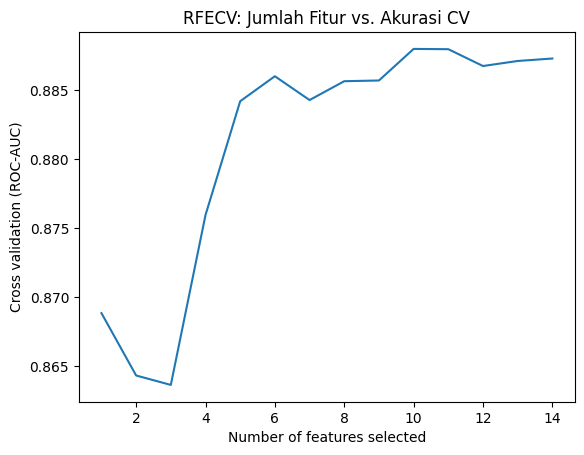

In [38]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.title('RFECV: Jumlah Fitur vs. Akurasi CV')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation (ROC-AUC)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()


In [39]:
X_train_scaled.columns

Index(['studyyear', 'age', 'spheq', 'acd', 'lt', 'vcd', 'sporthr', 'readhr',
       'comphr', 'studyhr', 'tvhr', 'gender_Female', 'mommy_Yes', 'dadmy_Yes'],
      dtype='object')

In [40]:
from sklearn.feature_selection import RFE

rfe = RFE(classifier, n_features_to_select=rfecv.n_features_, step=1)
rfe.fit(X_train_scaled, y_train.values.ravel())

print("Mask fitur terbaik (True/False):", rfe.support_)
print("Ranking fitur:", rfe.ranking_)


Mask fitur terbaik (True/False): [False False  True False  True  True  True  True False  True  True  True
  True  True]
Ranking fitur: [2 3 1 4 1 1 1 1 5 1 1 1 1 1]


In [41]:
#menyusun rfe agar mudah diinterpretasi
feature_names = ['studyyear', 'age', 'spheq', 'acd', 'lt', 'vcd', 'sporthr', 'readhr',
       'comphr', 'studyhr', 'tvhr', 'gender_Female', 'mommy_Yes', 'dadmy_Yes']


# Membuat DataFrame dari hasil RFE
rfe_results = pd.DataFrame({
    'Nama Fitur': feature_names,
    'Terpilih (True/False)': rfe.support_,
    'Peringkat RFE': rfe.ranking_
})

# Mengurutkan hasil berdasarkan Peringkat RFE (agar yang terpilih ada di atas)
rfe_results = rfe_results.sort_values(by='Peringkat RFE', ascending=True)

# Mencetak Tabel Hasil
print("\n--- Tabel Hasil Seleksi Fitur RFE ---")
print(rfe_results)


--- Tabel Hasil Seleksi Fitur RFE ---
       Nama Fitur  Terpilih (True/False)  Peringkat RFE
2           spheq                   True              1
6         sporthr                   True              1
5             vcd                   True              1
4              lt                   True              1
7          readhr                   True              1
11  gender_Female                   True              1
10           tvhr                   True              1
9         studyhr                   True              1
13      dadmy_Yes                   True              1
12      mommy_Yes                   True              1
0       studyyear                  False              2
1             age                  False              3
3             acd                  False              4
8          comphr                  False              5


In [42]:
## 2. Transformasi Data dan Pelatihan Model Akhir ##

# Transformasi Data Latih dan Data Uji (Hanya Fitur Terpilih)
X_train_RFE = rfe.transform(X_train_scaled)
X_test_RFE = rfe.transform(X_test_scaled)

# Latih Model Akhir dengan HANYA fitur terpilih
classifier.fit(X_train_RFE, y_train.values.ravel())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


LogisticRegression()

In [43]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_RFE)

In [44]:
# K-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train_RFE, y=y_train, cv=10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

print(f"Accuracy Model (10-Fold CV pada data RFE): {model_accuracy:.4f} (Std: {model_standard_deviation:.4f})")

Accuracy Model (10-Fold CV pada data RFE): 0.8907 (Std: 0.0224)


In [45]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix_results = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))



Confusion Matrix:
Predicted    0  1  All
True                  
0          105  4  109
1           10  5   15
All        115  9  124


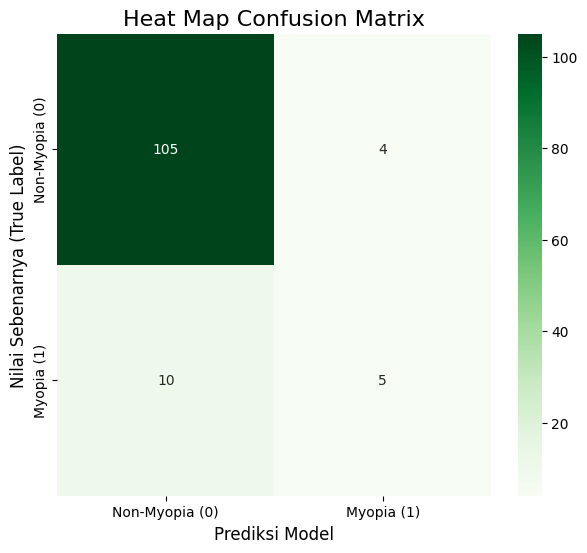

In [47]:
# Membuat Heatmap Confussion Matrix
# Mendefinisikan Label
labels = ['Non-Myopia (0)', 'Myopia (1)']

# Membuat Heat Map Confussion Matrix
plt.figure(figsize=(7, 6))

sns.heatmap(
    conf_matrix_results,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=labels,             # Label untuk kolom (Prediksi)
    yticklabels=labels              # Label untuk baris (Sebenarnya)
)

# Memberi label dan judul
plt.title('Heat Map Confusion Matrix', fontsize=16)
plt.xlabel('Prediksi Model', fontsize=12)
plt.ylabel('Nilai Sebenarnya (True Label)', fontsize=12)
plt.show()

In [48]:
from sklearn.metrics import classification_report
print("Classification Report (Menggunakan Fitur Terpilih):")
print(classification_report(y_test, y_pred))

Classification Report (Menggunakan Fitur Terpilih):
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       109
           1       0.56      0.33      0.42        15

    accuracy                           0.89       124
   macro avg       0.73      0.65      0.68       124
weighted avg       0.87      0.89      0.87       124



In [ ]:
#Genarate Reports
import statsmodels.api as sm
X_set = X_train_scaled.loc[:, rfe.support_]
X_set = sm.add_constant(X_set)
y = y_train.values
logit_model=sm.Logit(y,X_set)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.238596
         Iterations 8
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.393     
Date:               2025-11-22 18:07 AIC:              257.7325  
No. Observations:   494              BIC:              303.9604  
Df Model:           10               Log-Likelihood:   -117.87   
Df Residuals:       483              LL-Null:          -194.23   
Converged:          1.0000           LLR p-value:      1.0228e-27
No. Iterations:     8.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -3.3361   0.3056 -10.9154 0.0000 -3.9351 -2.7371
spheq            -2.2127   0.2758  -8.0217 0.0000 -2.7533 -1.6721


In [ ]:
# GETTING THE ODDS RATIOS, Z-VALUE, AND 95% CI
# Tabel Odds Ratio + P-value + CI 95%
model_odds = pd.DataFrame({
    "OR"    : np.exp(result.params),
    "p-value": result.pvalues,
})

# Confidence Interval 95% (dalam OR)
conf = np.exp(result.conf_int())
conf.columns = ["2.5%", "97.5%"]

# Gabungkan semuanya
model_or_ci = pd.concat([model_odds, conf], axis=1)

# Pembulatan opsional
model_or_ci = model_or_ci.round(4)

model_or_ci



,OR,p-value,2.5%,97.5%
const,0.0356,0.0000,0.0195,0.0648
spheq,0.1094,0.0000,0.0637,0.1879
lt,0.8278,0.3108,0.5744,1.1930
vcd,0.7543,0.1686,0.5049,1.1269
sporthr,0.6426,0.0225,0.4394,0.9396
readhr,1.2742,0.1562,0.9115,1.7811
studyhr,0.7643,0.1459,0.5320,1.0980
tvhr,0.8712,0.4541,0.6073,1.2499
gender_Female,1.2322,0.2411,0.8691,1.7471
mommy_Yes,1.5888,0.0126,1.1042,2.2859


AUC Score: 0.6483


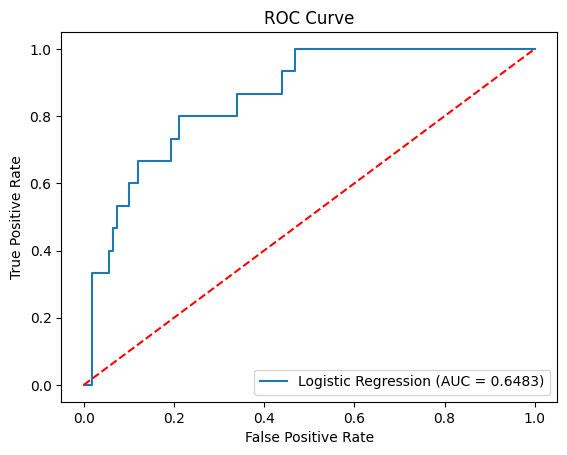

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Probabilitas kelas positif (benar)
y_pred_prob = classifier.predict_proba(X_test_RFE)[:, 1]

# AUC yang benar
auc_value = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_value:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_value:.4f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### 2. dengan diskretisasi

In [25]:
# Hitung jumlah observasi untuk setiap kelas
count_by_class = y_train.value_counts()
print(f'"Jumlah observasi per kelas:"{count_by_class}' )

# Hitung persentase observasi untuk setiap kelas
percentage_by_class = y_train.value_counts(normalize=True) * 100
print(f'"Persentase observasi per kelas:"{percentage_by_class}' )

"Jumlah observasi per kelas:"myopic
0    428
1     66
Name: count, dtype: int64
"Persentase observasi per kelas:"myopic
0   86.6397
1   13.3603
Name: proportion, dtype: float64


In [26]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(
    penalty=None,
    max_iter=2000,
    solver='lbfgs'
)
classifier.fit(X_train_woe, y_train)

LogisticRegression(max_iter=2000, penalty=None)

In [27]:
#Find relevant features
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [28]:
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(5), scoring='roc_auc')
rfecv.fit(X_train_woe, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)


Optimal number of features : 12


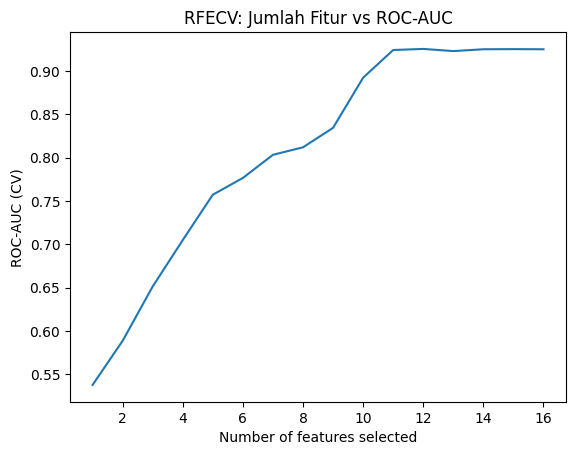

In [29]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.title('RFECV: Jumlah Fitur vs ROC-AUC')
plt.xlabel("Number of features selected")
plt.ylabel("ROC-AUC (CV)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
         rfecv.cv_results_['mean_test_score'])
plt.show()


In [30]:
X_train_woe.columns

Index(['studyyear', 'gender_Female', 'mommy_Yes', 'dadmy_Yes', 'age_woe',
       'spheq_woe', 'al_woe', 'acd_woe', 'lt_woe', 'vcd_woe', 'sporthr_woe',
       'readhr_woe', 'comphr_woe', 'studyhr_woe', 'tvhr_woe', 'diopterhr_woe'],
      dtype='object')

In [31]:
from sklearn.feature_selection import RFE
rfe = RFE(classifier, n_features_to_select=rfecv.n_features_, step=1)
rfe.fit(X_train_woe, y_train)

print("Mask fitur terbaik:", rfe.support_)
print("Ranking fitur:", rfe.ranking_)


Mask fitur terbaik: [False False  True  True  True  True False  True False  True  True  True
  True  True  True  True]
Ranking fitur: [5 2 1 1 1 1 4 1 3 1 1 1 1 1 1 1]


In [32]:
#menyusun rfe agar mudah diinterpretasi
feature_names = ['studyyear', 'gender_Female', 'mommy_Yes', 'dadmy_Yes', 'age_woe',
       'spheq_woe', 'al_woe', 'acd_woe', 'lt_woe', 'vcd_woe', 'sporthr_woe',
       'readhr_woe', 'comphr_woe', 'studyhr_woe', 'tvhr_woe', 'diopterhr_woe']


# Membuat DataFrame dari hasil RFE
rfe_results = pd.DataFrame({
    'Nama Fitur': feature_names,
    'Terpilih (True/False)': rfe.support_,
    'Peringkat RFE': rfe.ranking_
})

# Mengurutkan hasil berdasarkan Peringkat RFE (agar yang terpilih ada di atas)
rfe_results = rfe_results.sort_values(by='Peringkat RFE', ascending=True)

# Mencetak Tabel Hasil
print("\n--- Tabel Hasil Seleksi Fitur RFE ---")
print(rfe_results)


--- Tabel Hasil Seleksi Fitur RFE ---
       Nama Fitur  Terpilih (True/False)  Peringkat RFE
3       dadmy_Yes                   True              1
2       mommy_Yes                   True              1
5       spheq_woe                   True              1
4         age_woe                   True              1
7         acd_woe                   True              1
11     readhr_woe                   True              1
10    sporthr_woe                   True              1
9         vcd_woe                   True              1
14       tvhr_woe                   True              1
13    studyhr_woe                   True              1
15  diopterhr_woe                   True              1
12     comphr_woe                   True              1
1   gender_Female                  False              2
8          lt_woe                  False              3
6          al_woe                  False              4
0       studyyear                  False              5


In [33]:
## 2. Transformasi Data dan Pelatihan Model Akhir ##

# Transformasi Data Latih dan Data Uji (Hanya Fitur Terpilih)
X_train_RFE = rfe.transform(X_train_woe)
X_test_RFE = rfe.transform(X_test_woe)

# Latih Model Akhir dengan HANYA fitur terpilih
classifier.fit(X_train_RFE, y_train.values.ravel())

LogisticRegression(max_iter=2000, penalty=None)

In [34]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_RFE)

In [35]:
# K-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train_RFE, y=y_train, cv=10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

print(f"Accuracy Model (10-Fold CV pada data RFE): {model_accuracy:.4f} (Std: {model_standard_deviation:.4f})")

Accuracy Model (10-Fold CV pada data RFE): 0.9130 (Std: 0.0313)


In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix_results = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))



Confusion Matrix:
Predicted    0   1  All
True                   
0          104   5  109
1            9   6   15
All        113  11  124


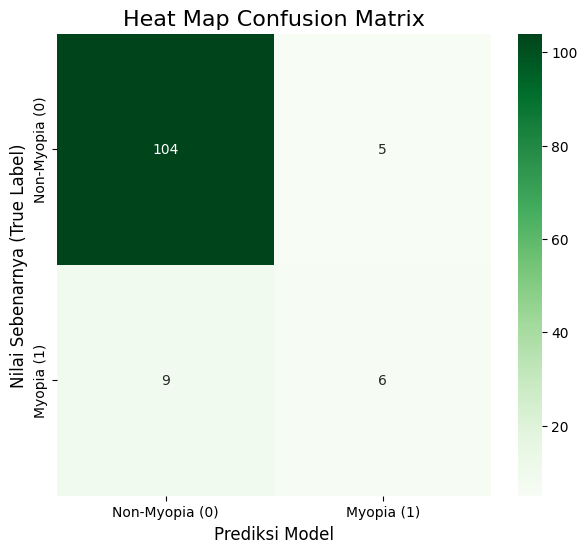

In [37]:
# Mendefinisikan Label
labels = ['Non-Myopia (0)', 'Myopia (1)']

# Membuat Heat Map Confussion Matrix
plt.figure(figsize=(7, 6))

sns.heatmap(
    conf_matrix_results,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=labels,             # Label untuk kolom (Prediksi)
    yticklabels=labels              # Label untuk baris (Sebenarnya)
)

# Memberi label dan judul
plt.title('Heat Map Confusion Matrix', fontsize=16)
plt.xlabel('Prediksi Model', fontsize=12)
plt.ylabel('Nilai Sebenarnya (True Label)', fontsize=12)
plt.show()

In [38]:
from sklearn.metrics import classification_report
print("Classification Report (Menggunakan Fitur Terpilih):")
print(classification_report(y_test, y_pred))

Classification Report (Menggunakan Fitur Terpilih):
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       109
           1       0.55      0.40      0.46        15

    accuracy                           0.89       124
   macro avg       0.73      0.68      0.70       124
weighted avg       0.88      0.89      0.88       124



In [ ]:
#Genarate Reports
import statsmodels.api as sm
selected_features = X_train_woe.columns[rfe.support_]
X_set = X_train_woe[selected_features]
X_set = sm.add_constant(X_set)
y = y_train.values
logit_model=sm.Logit(y,X_set)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.187771
         Iterations 9
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.522     
Date:               2025-11-22 18:59 AIC:              211.5182  
No. Observations:   494              BIC:              266.1511  
Df Model:           12               Log-Likelihood:   -92.759   
Df Residuals:       481              LL-Null:          -194.23   
Converged:          1.0000           LLR p-value:      8.0489e-37
No. Iterations:     9.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -3.7755   0.5503 -6.8610 0.0000 -4.8540 -2.6969
mommy_Yes          1.4805   0.4489  3.2979 0.0010  0.6006  2.3604


In [ ]:
# GETTING THE ODDS RATIOS, Z-VALUE, AND 95% CI
# Tabel Odds Ratio + P-value + CI 95%
model_odds = pd.DataFrame({
    "OR"    : np.exp(result.params),
    "p-value": result.pvalues,
})

# Confidence Interval 95% (dalam OR)
conf = np.exp(result.conf_int())
conf.columns = ["2.5%", "97.5%"]

# Gabungkan semuanya
model_or_ci = pd.concat([model_odds, conf], axis=1)

# Pembulatan opsional
model_or_ci = model_or_ci.round(4)

model_or_ci



,OR,p-value,2.5%,97.5%
const,0.0229,0.0000,0.0078,0.0674
mommy_Yes,4.3953,0.0010,1.8233,10.5954
dadmy_Yes,4.1667,0.0009,1.7928,9.6842
age_woe,4.4658,0.2453,0.3578,55.7476
spheq_woe,0.3408,0.0000,0.2548,0.4559
acd_woe,0.4262,0.1037,0.1526,1.1905
vcd_woe,0.3243,0.0981,0.0854,1.2313
sporthr_woe,0.2210,0.0000,0.1184,0.4123
readhr_woe,0.2309,0.0106,0.0750,0.7104
comphr_woe,3.6491,0.5337,0.0619,215.1617


AUC Score: 0.8214


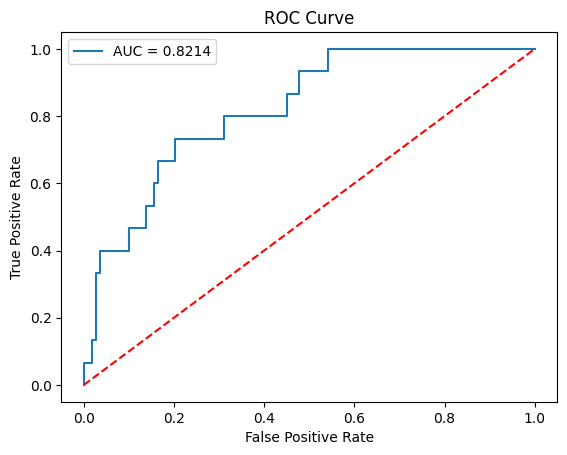

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred_prob = classifier.predict_proba(X_test_RFE)[:, 1]

auc_value = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_value:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc_value:.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()